In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = "../simulations/"

In [3]:
#r_list = ['0.0', '0.1', '1.0', '10.0', '100.0']
#r_list = np.logspace(-1,2,10)[:-1]
r_list = np.insert(np.logspace(-1,3,13), 0, 0.0)
print(r_list)
n_r = len(r_list)
n_samples = 100
x = np.arange(1, n_samples) / n_samples
x_fold = x[:n_samples//2]
pi_weight = 2*(x_fold)*(1 - x_fold)
print(pi_weight)

[  0.00000000e+00   1.00000000e-01   2.15443469e-01   4.64158883e-01
   1.00000000e+00   2.15443469e+00   4.64158883e+00   1.00000000e+01
   2.15443469e+01   4.64158883e+01   1.00000000e+02   2.15443469e+02
   4.64158883e+02   1.00000000e+03]
[ 0.0198  0.0392  0.0582  0.0768  0.095   0.1128  0.1302  0.1472  0.1638
  0.18    0.1958  0.2112  0.2262  0.2408  0.255   0.2688  0.2822  0.2952
  0.3078  0.32    0.3318  0.3432  0.3542  0.3648  0.375   0.3848  0.3942
  0.4032  0.4118  0.42    0.4278  0.4352  0.4422  0.4488  0.455   0.4608
  0.4662  0.4712  0.4758  0.48    0.4838  0.4872  0.4902  0.4928  0.495
  0.4968  0.4982  0.4992  0.4998  0.5   ]


In [14]:
sim = 'a-2.0'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 4

mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_kingman = jMAF_fold
mMAF_kingman = mMAF_fold
ratio_kingman = ratio_fold
pi_kingman = np.dot(mMAF_fold, pi_weight)


PMI_kingman = np.log2(ratio_fold)
wPMI_kingman = jMAF_kingman*PMI_kingman
diag_kingman = np.diagonal(wPMI_kingman, axis1=1, axis2=2)
offdiag_kingman = (np.sum(wPMI_kingman, axis=2) - diag_kingman)

In [59]:
sim = 'a-1.75'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 4


mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_mmc = jMAF_fold
mMAF_mmc = mMAF_fold
pi_mmc = np.dot(mMAF_fold, pi_weight)
#PMI_mmc = jMAF_fold * np.log2(ratio_fold)
PMI_mmc = np.log2(ratio_fold)
wPMI_mmc = jMAF_kingman*PMI_mmc
diag_mmc = np.diagonal(wPMI_mmc, axis1=1, axis2=2)
offdiag_mmc = (np.sum(wPMI_mmc, axis=2) - diag_mmc)

/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide


In [16]:
sim = 'a-1.01'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    filecount = 0.0
    for rep in range(10):
        fn = 'jsfs_{}_r-{}_rep-{}.txt'.format(sim, r, rep)
        try:
            datafile = open(data_dir + fn)
        except FileNotFoundError:
            continue
        filecount += 1
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] += np.array(line.split(), dtype=float)
                jMAF_triu[i,:] += np.array(datafile.readline().split(), dtype=float)
                break
        datafile.close()
    mMAF[i,:] /= filecount
    jMAF_triu[i,:] /= filecount
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 4


mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_bsc = jMAF_fold
mMAF_bsc = mMAF_fold
pi_bsc = np.dot(mMAF_fold, pi_weight)
#PMI_bsc = jMAF_fold * np.log2(ratio_fold)
PMI_bsc = np.log2(ratio_fold)
wPMI_bsc = jMAF_bsc*PMI_bsc
diag_bsc = np.diagonal(wPMI_bsc, axis1=1, axis2=2)
offdiag_bsc = (np.sum(wPMI_bsc, axis=2) - diag_bsc)

/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [17]:
sim = 'T-0.01_S-0.1'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 4


mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_step = jMAF_fold
mMAF_step = mMAF_fold
pi_step = np.dot(mMAF_fold, pi_weight)
#PMI_step = jMAF_fold * np.log2(ratio_fold)
PMI_step = np.log2(ratio_fold)
wPMI_step = jMAF_step*PMI_step
diag_step = np.diagonal(wPMI_step, axis1=1, axis2=2)
offdiag_step = (np.sum(wPMI_step, axis=2) - diag_step)

In [46]:
sim = 'g-2.0'
mMAF = np.zeros((n_r, n_samples-1))
jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
for i, r in enumerate(r_list):
    fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
    with open(data_dir + fn) as datafile:
        for line in datafile:
            if line.startswith('#'):
                continue
            else:
                mMAF[i,:] = np.array(line.split(), dtype=float)
                jMAF_triu[i,:] = np.array(datafile.readline().split())
                break
                
jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
for i in range(n_r):
    jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
    jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF, axes=(0,2,1))

x_fold = x[:n_samples//2]
mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
mMAF_fold[:,-1] /= 2

jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
jMAF_fold[:,-1,:-1] /= 2
jMAF_fold[:,:-1,-1] /= 2
jMAF_fold[:,-1,-1] /= 4


mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_exp = jMAF_fold
mMAF_exp = mMAF_fold
pi_exp = np.dot(mMAF_fold, pi_weight)
#PMI_exp = jMAF_fold * np.log2(ratio_fold)
PMI_exp = np.log2(ratio_fold)
wPMI_exp = jMAF_exp*PMI_exp
diag_exp = np.diagonal(wPMI_exp, axis1=1, axis2=2)
offdiag_exp = (np.sum(wPMI_exp, axis=2) - diag_exp)

In [47]:
print(pi_kingman)
print(pi_mmc)
print(pi_bsc)
print(pi_step)
print(pi_exp)

[ 1.97984264  1.9797683   1.97754926  1.98272966  1.98210526  1.98166954
  1.98094112  1.9815702   1.97896617  1.9827001   1.98249799  1.98372225
  1.97812777  1.97753019]
[ 1.9812246   1.97844118  1.98283893  1.97901912  1.98820122  1.9755378
  1.97770564  1.97817148  1.98183064  1.97612384  1.98991442  1.97864794
  0.          0.        ]
[ 1.98079169  1.98338896  1.98284297  1.97304608  1.98112801  1.98104831
  1.9728746   1.97987245  1.98602637  1.98066997  1.97861487         nan
         nan         nan]
[ 0.21565633  0.21543942  0.21645102  0.21604638  0.21575282  0.21559892
  0.21616343  0.21560943  0.21570309  0.21584888  0.21597416  0.21559415
  0.21557459  0.21547297]
[ 0.91376295  0.91305804  0.9131595   0.9140467   0.91360714  0.91374785
  0.91304837  0.91337104  0.91474681  0.9141221   0.91368316  0.91376311
  0.9143582   0.91357719]


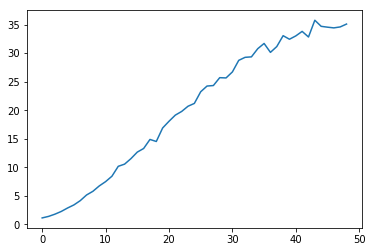

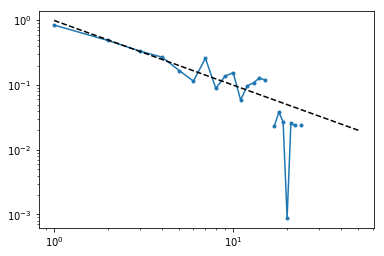

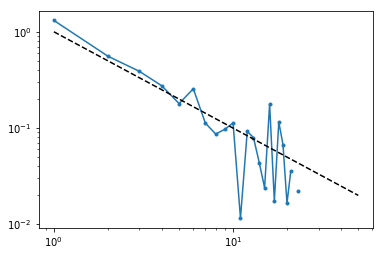

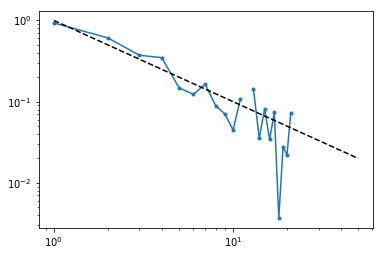

In [6]:
plt.plot(np.diagonal(ratio_kingman[0,:,:])[:-1])
plt.show()

plt.loglog(np.diagonal(ratio_kingman[3,:,::-1]-ratio_kingman[0,:,::-1], offset=-2)[23:], '.-')
plt.loglog(x_fold*n_samples, (x_fold*n_samples)**-1, '--k')
plt.show()

plt.loglog(np.diagonal(ratio_kingman[3,:,::-1]-ratio_kingman[0,:,::-1], offset=-4)[22:], '.-')
plt.loglog(x_fold*n_samples, (x_fold*n_samples)**-1, '--k')
plt.show()

plt.loglog(np.diagonal(ratio_kingman[3,:,::-1]-ratio_kingman[0,:,::-1], offset=-6)[21:], '.-')
plt.loglog(x_fold*n_samples, (x_fold*n_samples)**-1, '--k')
plt.show()

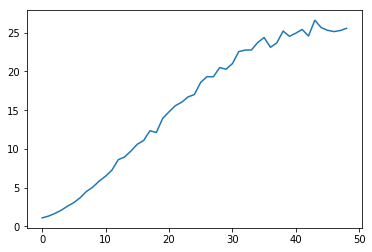

0.1


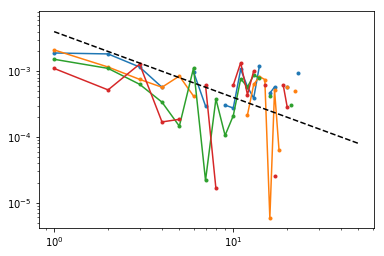

0.215443469003


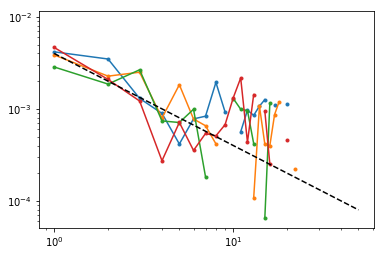

0.464158883361


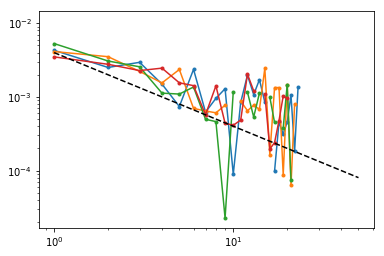

1.0


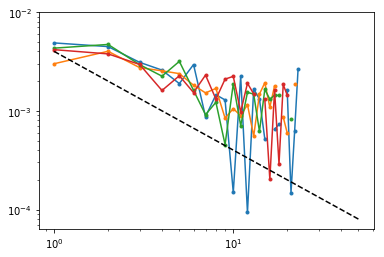

2.15443469003


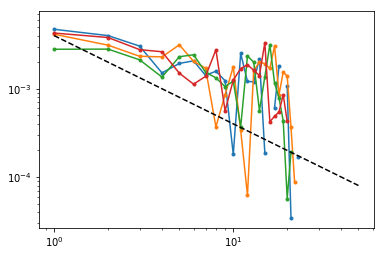

4.64158883361


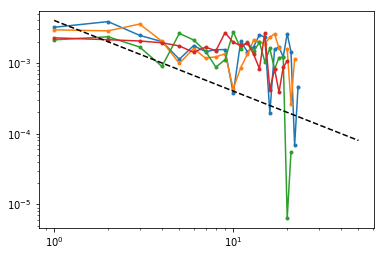

10.0


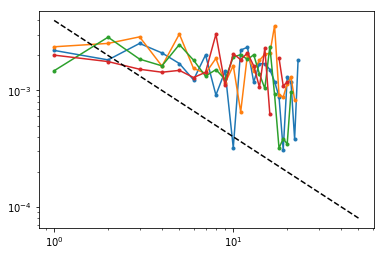

In [131]:
plt.plot(np.diagonal(ratio_kingman[0,:,:])[:-1])
plt.show()

for i in range(1,8):
    print(r_list[i])
    for offset in [2,4,6,8]:
        plt.loglog(np.diagonal(jMAF_kingman[i,:,::-1]-jMAF_kingman[0,:,::-1], offset=-offset)[25-offset//2:], '.')
    #plt.loglog(x_fold*n_samples, 0.004*(x_fold*n_samples)**-1, '--k')
    plt.show()

#plt.loglog(np.diagonal(ratio_kingman[3,:,::-1]-ratio_kingman[0,:,::-1], offset=-4)[22:], '.-')
#plt.loglog(x_fold*n_samples, (x_fold*n_samples)**-1, '--k')
#plt.show()

#plt.loglog(np.diagonal(ratio_kingman[3,:,::-1]-ratio_kingman[0,:,::-1], offset=-6)[21:], '.-')
#plt.loglog(x_fold*n_samples, (x_fold*n_samples)**-1, '--k')
#plt.show()

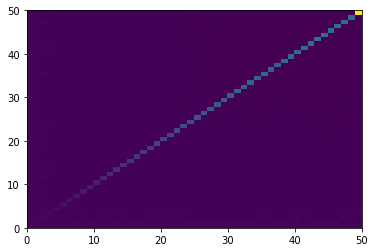

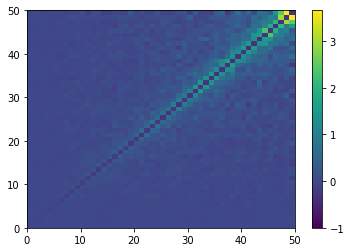

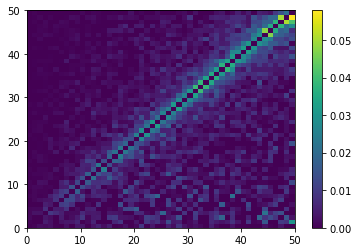

In [192]:
plt.pcolor(ratio_kingman[0,:,:])
plt.show()
plt.pcolor((ratio_kingman[1,:,:]-ratio_kingman[0,:,:])/ratio_kingman[0,:,:],vmin=-1)
plt.colorbar()
plt.show()
plt.pcolor((ratio_kingman[1,:,:]-ratio_kingman[0,:,:])/np.diagonal(ratio_kingman[0,:,:])[:,None], vmin=0)
plt.colorbar()
plt.show()

0.1
0.215443469003
0.464158883361
1.0
2.15443469003
4.64158883361
10.0
21.5443469003
46.4158883361


/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/ticker.py:2039: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in reciprocal


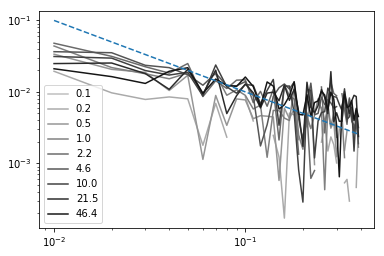

In [190]:
condMAF = jMAF_kingman/mMAF_kingman[:,:,None]
diffMAF = condMAF - mMAF_kingman[:,None,:]
j=10
for i, r in enumerate(r_list[1:]):
    print(r)
    color=str((2-np.log10(r))/4)
    #plt.pcolor(condMAF[i,:,:],vmin=0,vmax=2)
    #plt.colorbar()
    #plt.show()
    #plt.plot(x_fold,condMAF[i,j,:])
    #plt.show()
    #plt.plot(x_fold,diffMAF[i,j,:])
    #plt.show()
    plt.loglog(x_fold-(j+1)/n_samples, diffMAF[i,j,:]-diffMAF[0,j,:],c=color,label='{:.1f}'.format(r))
    #plt.ylim([-0.01,0.03])
#plt.hlines(0, x_fold[0], x_fold[-1], linestyle='dashed', color='.25')
plt.plot(x_fold-(j+1)/n_samples, 1e-3*(x_fold-(j+1)/n_samples)**-1, '--')
plt.legend()
plt.show()

In [ ]:
# plt.loglog(x_fold, mMAF_kingman[0,:])
#plt.loglog(x_fold, mMAF_mmc[0,:])
#plt.loglog(x_fold, mMAF_bsc[0,:])
#plt.loglog(x_fold, mMAF_step[0,:])
plt.show()

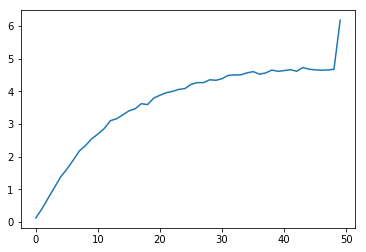

In [61]:
plt.plot(np.diagonal(PMI_kingman[0,:,:]))
plt.show()

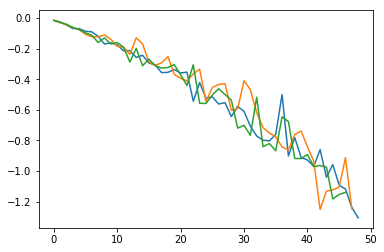

In [63]:
plt.plot(np.diagonal(PMI_kingman[0,:,:], offset=1))
plt.plot(np.diagonal(PMI_kingman[0,:,:], offset=2))
plt.plot(np.diagonal(PMI_kingman[0,:,:], offset=3))
plt.show()

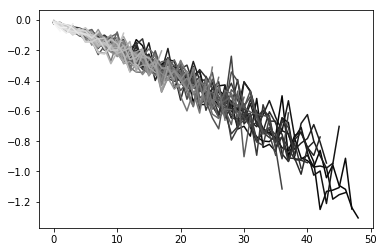

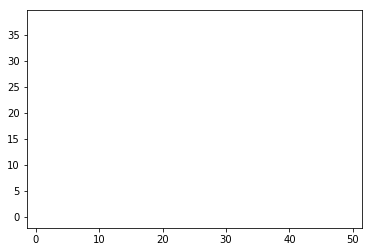

In [79]:
for i in range(1,50):
    color = str(i/50)
    plt.plot(np.diagonal(PMI_kingman[0,:,:], offset=i), color=color)
plt.show()

for i in range(1,50):
    #color = str(i/50)
    plt.plot(i, np.nansum(np.diagonal((PMI_kingman[1,:,:]-PMI_kingman[0,:,:]), offset=i)))#, color=color)
plt.show()

0.0
0.0


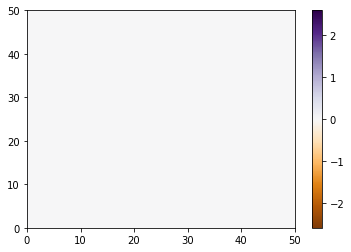

0.1
295.686875862


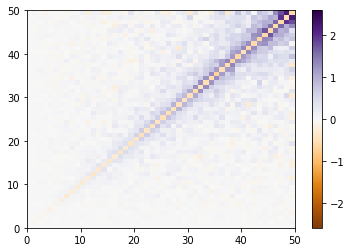

0.215443469003
466.520223952


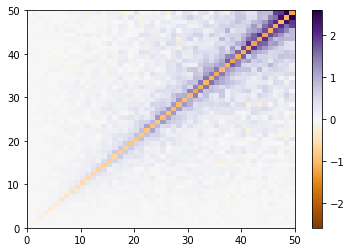

0.464158883361
589.657144836


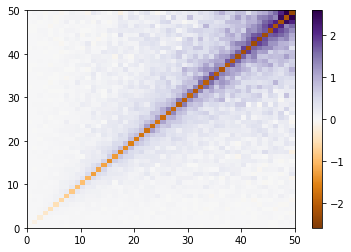

1.0
597.850053212


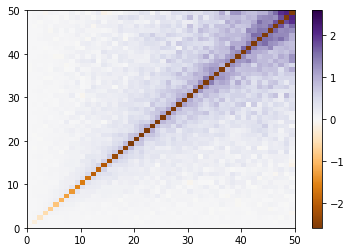

2.15443469003
507.56906832


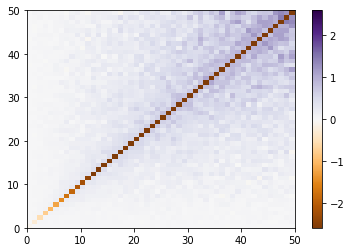

4.64158883361
425.505219344


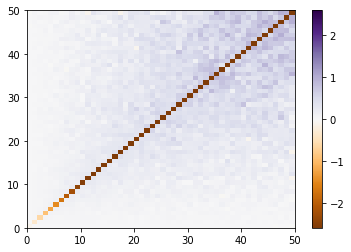

10.0
385.499811699


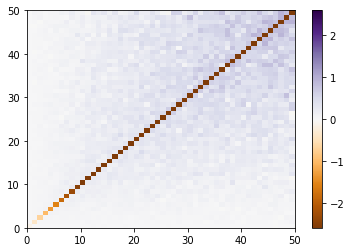

21.5443469003
366.476113704


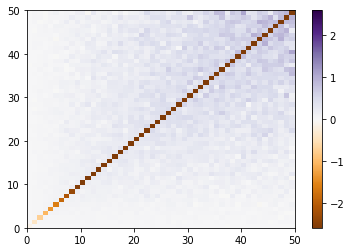

46.4158883361
363.027477184


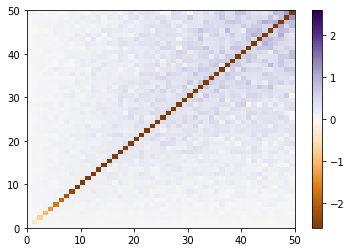

In [91]:
for i, r in enumerate(r_list):
    print(r)
    plt.pcolor(PMI_kingman[i,:,:]-PMI_kingman[0,:,:], vmin=-2.6, vmax=2.6, cmap='PuOr')
    print(np.sum(PMI_kingman[i,:,:]-PMI_kingman[0,:,:]))
    plt.colorbar()
    plt.show()

# wPMI

0.0


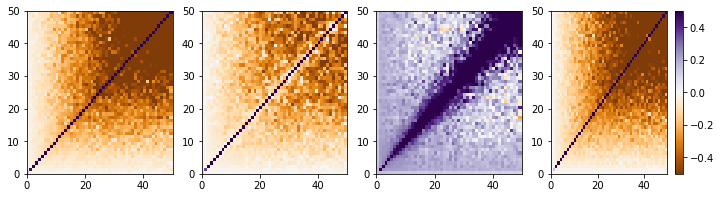

0.1


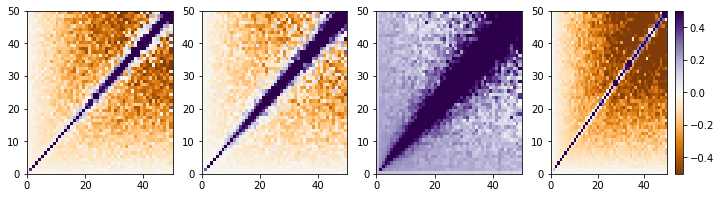

0.215443469003


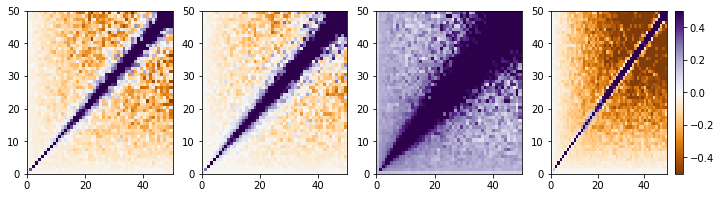

0.464158883361


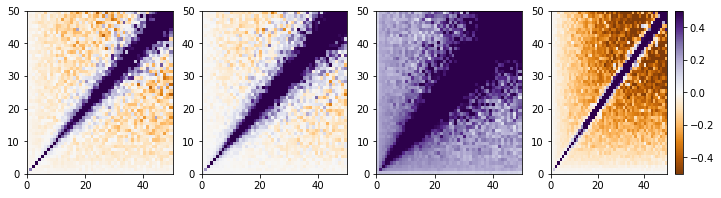

1.0


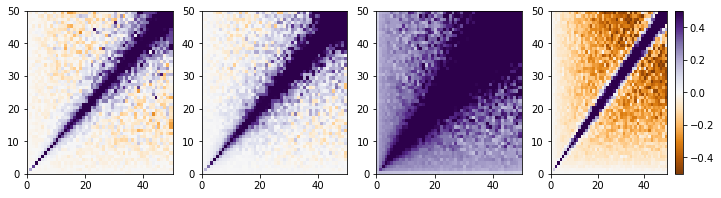

2.15443469003


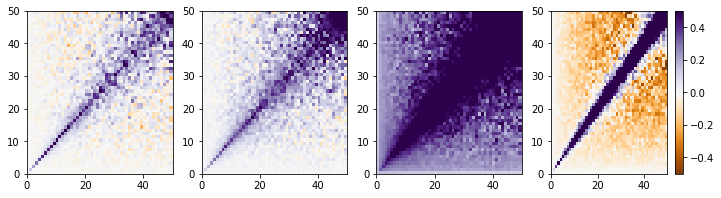

4.64158883361


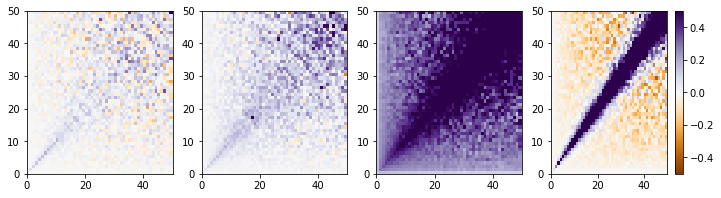

10.0


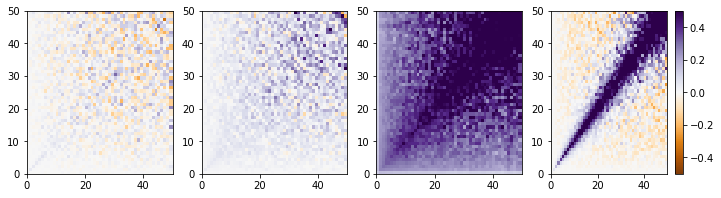

21.5443469003


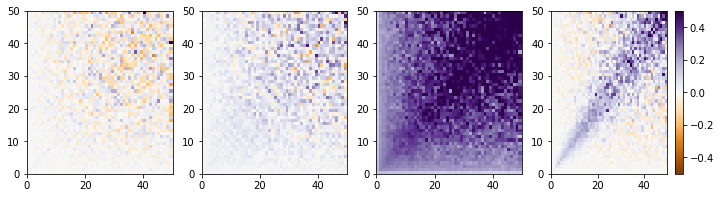

46.4158883361


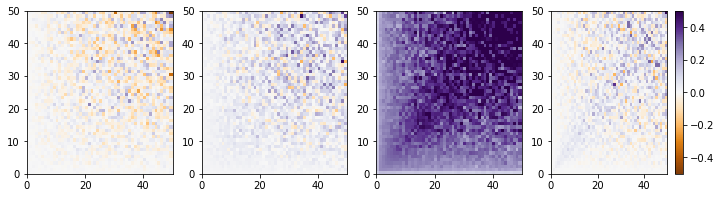

100.0


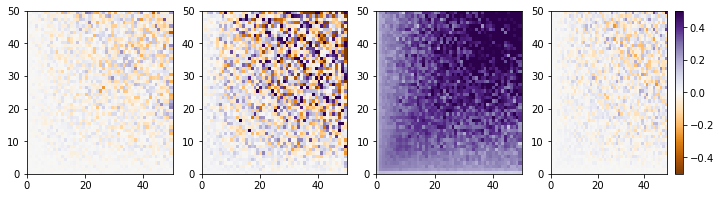

215.443469003


/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


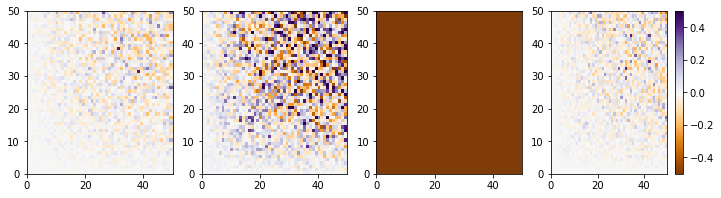

464.158883361


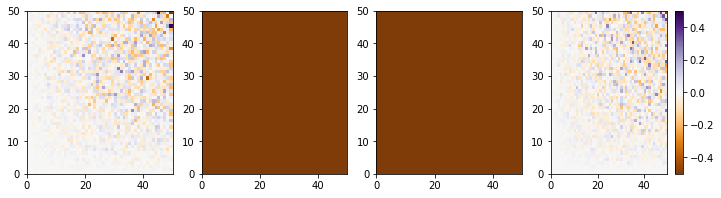

1000.0


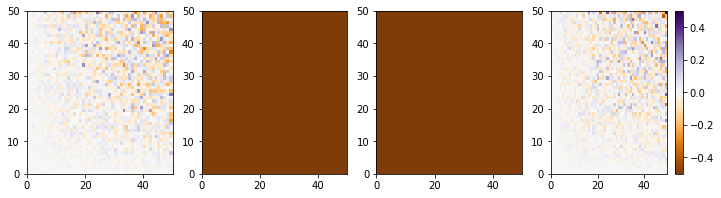

In [60]:
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(12,3))
    ax = plt.subplot(1,4,1)
    plt.pcolor(PMI_kingman[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    ax = plt.subplot(1,4,2)
    plt.pcolor(PMI_mmc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    ax = plt.subplot(1,4,3)
    plt.pcolor(PMI_bsc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    ax = plt.subplot(1,4,4)
    plt.pcolor(PMI_step[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')


    plt.colorbar()
    plt.show()

0.0


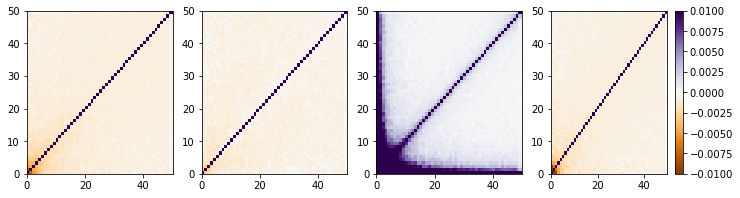

0.1


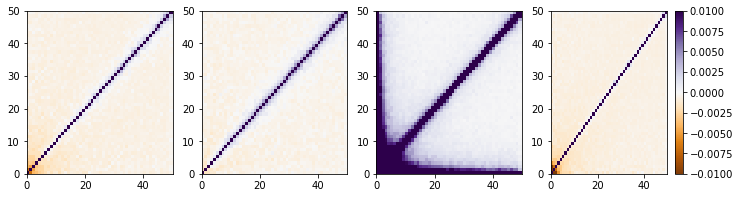

0.215443469003


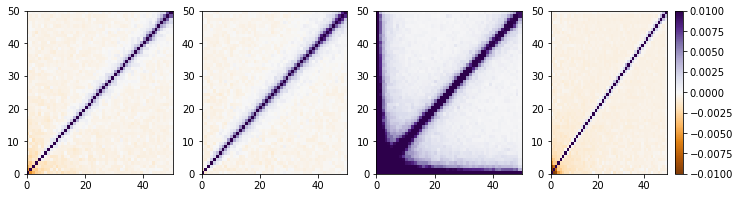

0.464158883361


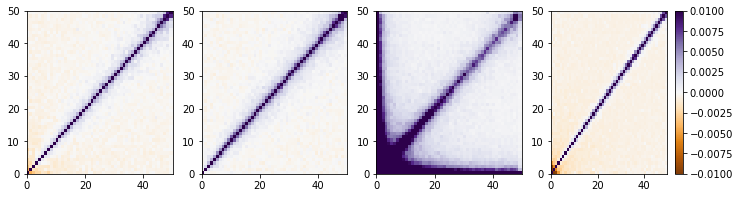

1.0


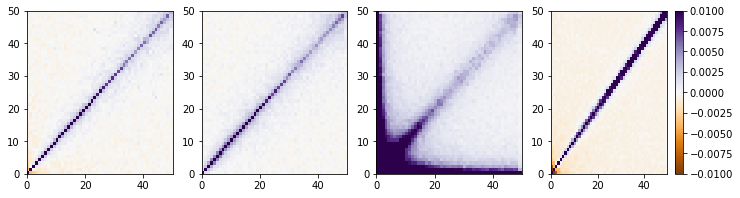

2.15443469003


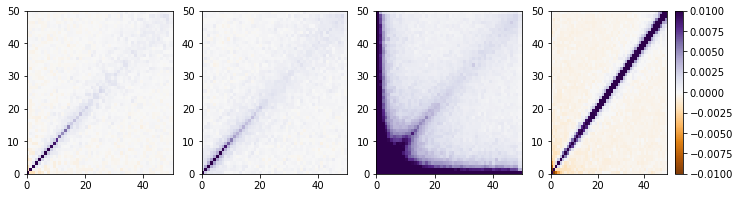

4.64158883361


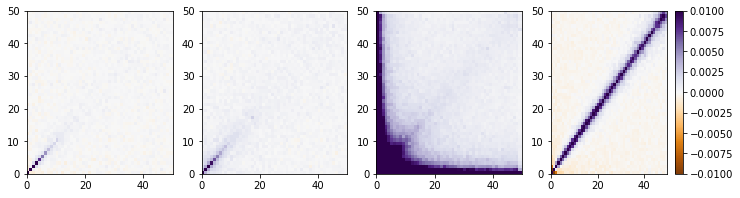

10.0


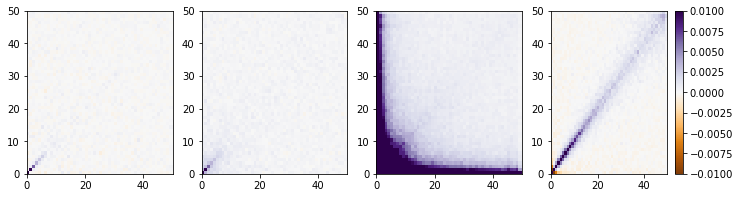

21.5443469003


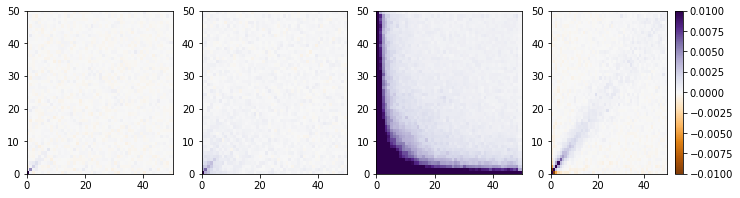

46.4158883361


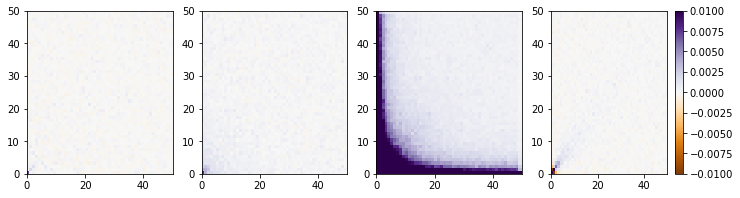

100.0


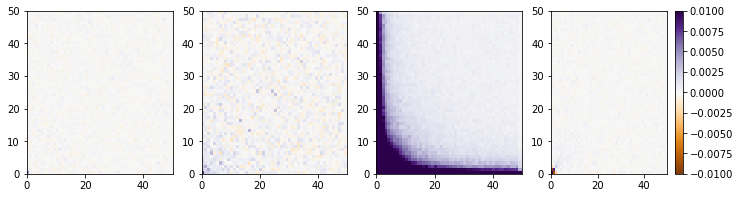

215.443469003


/home/dpr/miniconda3/envs/mmc_py35/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


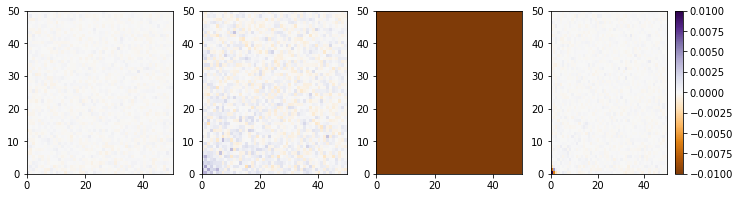

464.158883361


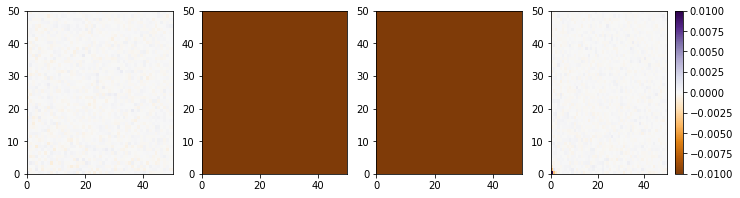

1000.0


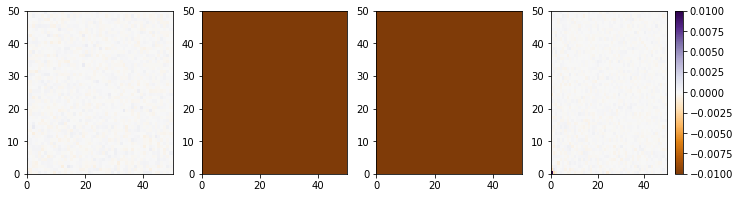

In [61]:
vext=0.01
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(12,3))
    ax = plt.subplot(1,4,1)
    plt.pcolor(wPMI_kingman[i,:,:]/pi_kingman[i]**2, vmin=-vext, vmax=vext, cmap='PuOr')
    
    ax = plt.subplot(1,4,2)
    ax.pcolor(wPMI_mmc[i,:,:]/pi_mmc[i]**2, vmin=-vext, vmax=vext, cmap='PuOr')
    
    ax = plt.subplot(1,4,3)
    plt.pcolor(wPMI_bsc[i,:,:]/pi_bsc[i]**2, vmin=-vext, vmax=vext, cmap='PuOr')
    
    ax = plt.subplot(1,4,4)
    plt.pcolor(wPMI_step[i,:,:]/pi_step[i]**2, vmin=-vext, vmax=vext, cmap='PuOr')


    plt.colorbar()

    #plt.colorbar()
    plt.show()

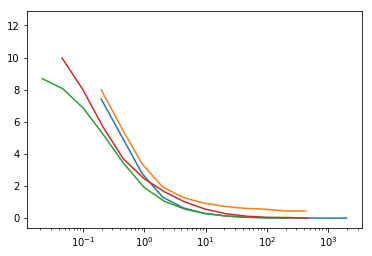

In [62]:
plt.semilogx(r_list*pi_kingman, np.sum(wPMI_kingman,axis=(1,2))/pi_kingman**2)
plt.semilogx(r_list*pi_mmc, np.sum(wPMI_mmc,axis=(1,2))/pi_mmc**2)
plt.semilogx(r_list*pi_step, np.sum(wPMI_step,axis=(1,2))/pi_step**2)
plt.semilogx(r_list*pi_exp, np.sum(wPMI_exp,axis=(1,2))/pi_exp**2)


plt.show()

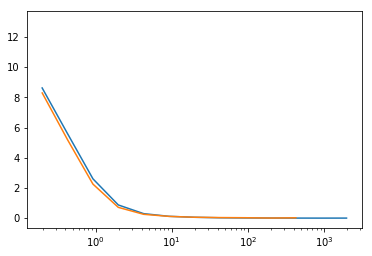

In [63]:
plt.semilogx(r_list*pi_kingman, np.sum(diag_kingman,axis=1)/pi_kingman**2)
plt.semilogx(r_list*pi_mmc, np.sum(diag_mmc,axis=1)/pi_mmc**2)
#plt.semilogx(r_list*pi_bsc, np.sum(diag_bsc,axis=1)/pi_mmc**2)



#plt.semilogx(r_list*pi_mmc, np.sum(wPMI_mmc,axis=(1,2))/pi_mmc**2)
#plt.semilogx(r_list*pi_step, np.sum(wPMI_step,axis=(1,2))/pi_step**2)
plt.show()

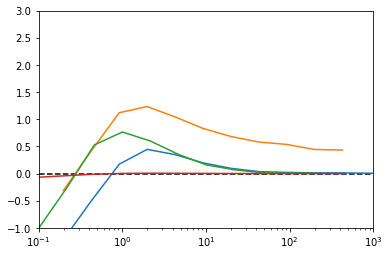

In [69]:
plt.semilogx(r_list*pi_kingman, np.sum(offdiag_kingman,axis=1)/pi_kingman**2)
plt.semilogx(r_list*pi_mmc, np.sum(offdiag_mmc,axis=1)/pi_mmc**2)
#plt.semilogx(r_list*pi_bsc, np.sum(offdiag_bsc,axis=1)/pi_bsc**2)
plt.semilogx(r_list*pi_step, np.sum(offdiag_step,axis=1)/pi_step**2)
plt.semilogx(r_list*pi_exp, np.sum(offdiag_exp,axis=1)/pi_exp**2)

plt.hlines(0, 1e-1, 1e3, linestyle='dashed')
plt.xlim([1e-1,1e3])
plt.ylim([-1,3])


#plt.semilogx(r_list*pi_mmc, np.sum(wPMI_mmc,axis=(1,2))/pi_mmc**2)
#plt.semilogx(r_list*pi_step, np.sum(wPMI_step,axis=(1,2))/pi_step**2)
plt.show()

## Exponential growth

1.0 1.1792713915
2.0 0.913762950358
4.0 0.663227725527
8.0 0.455302226234


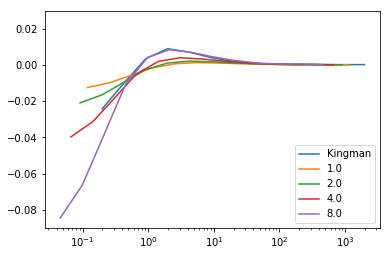

In [58]:
plt.plot(r_list*pi_kingman, np.mean(offdiag_kingman, axis=1)/pi_kingman**2, label='Kingman')

for g in [1.0, 2.0, 4.0, 8.0]:
    sim = 'g-{}'.format(g)
    mMAF = np.zeros((n_r, n_samples-1))
    jMAF_triu = np.zeros((n_r, n_samples*(n_samples-1)//2))
    for i, r in enumerate(r_list):
        fn = 'jsfs_{}_r-{}.txt'.format(sim, r)
        with open(data_dir + fn) as datafile:
            for line in datafile:
                if line.startswith('#'):
                    continue
                else:
                    mMAF[i,:] = np.array(line.split(), dtype=float)
                    jMAF_triu[i,:] = np.array(datafile.readline().split())
                    break

    jMAF = np.zeros((n_r, n_samples-1, n_samples-1))
    for i in range(n_r):
        jMAF[i,:,:][np.triu_indices(n_samples-1)] = jMAF_triu[i,:]
        jMAF[i,:,:][np.diag_indices(n_samples-1)] /= 2
    jMAF += np.transpose(jMAF, axes=(0,2,1))

    mMAF_fold = (mMAF + mMAF[:,::-1])[:,:n_samples//2]
    mMAF_fold[:,-1] /= 2

    jMAF_fold = (jMAF + jMAF[:,::-1,:] + jMAF[:,:,::-1] + jMAF[:,::-1,::-1])[:, :n_samples//2, :n_samples//2]
    jMAF_fold[:,-1,:-1] /= 2
    jMAF_fold[:,:-1,-1] /= 2
    jMAF_fold[:,-1,-1] /= 4

    mMAF_sq_fold = mMAF_fold[:,:,None] * mMAF_fold[:,None,:]
    ratio_fold = jMAF_fold / mMAF_sq_fold

    pi_exp = np.dot(mMAF_fold, pi_weight)
    PMI_exp = np.log2(ratio_fold)
    diag_exp = np.diagonal(wPMI_exp, axis1=1, axis2=2)
    offdiag_exp = (np.sum(wPMI_exp, axis=2) - diag_exp) / (n_samples/2 - 1)
    
    plt.semilogx(r_list*pi_exp, np.sum(offdiag_exp, axis=1)/pi_exp**2, label=g)
    print(g, pi_exp[0])
plt.ylim([-0.09,0.03])
plt.legend()
plt.show()

# Coarse-graining

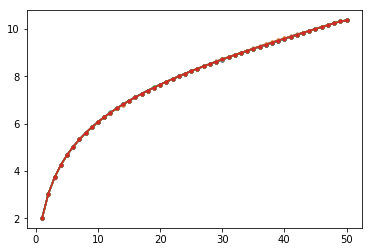

In [67]:
plt.plot(x_fold*n_samples, np.cumsum(mMAF_kingman,axis=1).T, '.-')
plt.show()

## Simulations

In [ ]:
res = 10
pad = (res - (mMAF_fold.shape[1] % res)) % res

m_padded = np.pad(mMAF_fold, ((0,0),(0,pad)), 'constant')
mMAF_coarse = m_padded.reshape(-1, m_padded.shape[1]//res, res).sum(axis=2)

j_padded = np.pad(jMAF_fold, ((0,0), (0,pad), (0,pad)), 'constant')
jMAF_coarse = j_padded.reshape(-1, j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(2,4))

ratio_coarse = jMAF_coarse / (mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None])

In [ ]:
fig1 = plt.figure(figsize=(12,4))
fig2 = plt.figure(figsize=(12,4))
fig3 = plt.figure(figsize=(12,6))

res_list = [1,2,4,8]
for i_res, res in enumerate(res_list):
    pad = (res - (mMAF_fold.shape[1] % res)) % res

    m_padded = np.pad(mMAF_fold, ((0,0),(0,pad)), 'constant')
    mMAF_coarse = m_padded.reshape(-1, m_padded.shape[1]//res, res).sum(axis=2)

    j_padded = np.pad(jMAF_fold, ((0,0), (0,pad), (0,pad)), 'constant')
    jMAF_coarse = j_padded.reshape(-1, j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(2,4))

    ratio_coarse = jMAF_coarse / (mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None])
    print(np.sum(mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None]*np.log2(ratio_coarse), axis=(1,2)))

    for i_r, r in enumerate(r_list):
        #print(r)
        ax = fig1.add_subplot(len(res_list), n_r, i_res*n_r + i_r + 1)
        ax.pcolormesh(np.log2(ratio_coarse[i_r,:,:]), vmin=-.5, vmax=.5, cmap='PuOr')
        
        ax = fig2.add_subplot(len(res_list), n_r, i_res*n_r + i_r + 1)
        for o in range(1,20,4):
            ax.plot(np.log2(np.diagonal(ratio_coarse[i_r,:,:], offset=o//res)))
        ax.set_ylim([-.5,.5])
    
    ax = fig3.add_subplot(len(res_list), 2, 2*i_res+1)
    diag = np.sum(np.diagonal(np.log2(ratio_coarse), axis1=1, axis2=2), axis=1)
    ax.semilogx(r_list, diag)
    ax.hlines(0,r_list[0],r_list[-1], linestyle='dashed', color='.25')
    ax = fig3.add_subplot(len(res_list), 2, 2*i_res+2)
    ax.semilogx(r_list, np.sum(np.log2(ratio_coarse), axis=(1,2))-diag)
    ax.hlines(0,r_list[0],r_list[-1], linestyle='dashed', color='.25')

plt.show()

In [ ]:
fig = plt.figure(figsize=(12,4))
res_list = [1,2,4,8]
for i_res, res in enumerate(res_list):
    pad = (res - (mMAF_fold.shape[1] % res)) % res

    m_padded = np.pad(mMAF_fold, ((0,0),(0,pad)), 'constant')
    mMAF_coarse = m_padded.reshape(-1, m_padded.shape[1]//res, res).sum(axis=2)

    j_padded = np.pad(jMAF_fold, ((0,0), (0,pad), (0,pad)), 'constant')
    jMAF_coarse = j_padded.reshape(-1, j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(2,4))

    ratio_coarse = jMAF_coarse / (mMAF_coarse[:,None,:]*mMAF_coarse[:,:,None])
    MI = np.sum(jMAF_coarse*np.log2(ratio_coarse), axis=(1,2))
    print(MI/MI[0])
    for i_r, r in enumerate(r_list):
        #print(r)
        ax = fig.add_subplot(len(res_list), n_r, i_res*n_r + i_r + 1)
        ax.pcolormesh(np.log2(ratio_coarse[i_r,:,:])>0)
plt.show()

# Independent sites

In [26]:
#mMAF = np.zeros(n_samples-1)
#jMAF_triu = np.zeros(n_samples*(n_samples-1)//2)
fn = 'jsfs_a-2.0_unlinked.txt'
with open(data_dir + fn) as datafile:
    for line in datafile:
        if line.startswith('#'):
            continue
        else:
            mMAF = np.array(line.split(), dtype=float)
            jMAF_triu = np.array(datafile.readline().split())
            break
                
jMAF = np.zeros((n_samples-1, n_samples-1))
jMAF[np.triu_indices(n_samples-1)] = jMAF_triu[:]
jMAF[np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF)

mMAF_fold = (mMAF + mMAF[::-1])[:n_samples//2]
mMAF_fold[-1] /= 2

jMAF_fold = (jMAF + jMAF[::-1,:] + jMAF[:,::-1] + jMAF[::-1,::-1])[:n_samples//2, :n_samples//2]
jMAF_fold[-1,:-1] /= 2
jMAF_fold[:-1,-1] /= 2
jMAF_fold[-1,-1] /= 4



mMAF_sq_fold = mMAF_fold[:,None] * mMAF_fold[None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_unlinked = jMAF_fold
mMAF_unlinked = mMAF_fold
pi_unlinked = np.dot(mMAF_fold, pi_weight)
PMI_unlinked = np.log2(ratio_fold)
wPMI_unlinked = jMAF_unlinked*np.log2(ratio_fold)
diag_unlinked = np.diagonal(PMI_unlinked)
offdiag_unlinked = (np.sum(PMI_unlinked, axis=1) - diag_unlinked)# / (n_samples/2 - 1)

In [27]:
#mMAF = np.zeros(n_samples-1)
#jMAF_triu = np.zeros(n_samples*(n_samples-1)//2)
fn = 'jsfs_a-1.01_unlinked.txt'
with open(data_dir + fn) as datafile:
    for line in datafile:
        if line.startswith('#'):
            continue
        else:
            mMAF = np.array(line.split(), dtype=float)
            jMAF_triu = np.array(datafile.readline().split())
            break
                
jMAF = np.zeros((n_samples-1, n_samples-1))
jMAF[np.triu_indices(n_samples-1)] = jMAF_triu[:]
jMAF[np.diag_indices(n_samples-1)] /= 2
jMAF += np.transpose(jMAF)

mMAF_fold = (mMAF + mMAF[::-1])[:n_samples//2]
mMAF_fold[-1] /= 2

jMAF_fold = (jMAF + jMAF[::-1,:] + jMAF[:,::-1] + jMAF[::-1,::-1])[:n_samples//2, :n_samples//2]
jMAF_fold[-1,:-1] /= 2
jMAF_fold[:-1,-1] /= 2
jMAF_fold[-1,-1] /= 4


mMAF_sq_fold = mMAF_fold[:,None] * mMAF_fold[None,:]
ratio_fold = jMAF_fold / mMAF_sq_fold

jMAF_bsc_unlinked = jMAF_fold
mMAF_bsc_unlinked = mMAF_fold
pi_bsc_unlinked = np.dot(mMAF_fold, pi_weight)

PMI_bsc_unlinked = np.log2(ratio_fold)
wPMI_bsc_unlinked = jMAF_fold*np.log2(ratio_fold)
diag_bsc_unlinked = np.diagonal(PMI_bsc_unlinked)
offdiag_bsc_unlinked = (np.sum(PMI_bsc_unlinked, axis=1) - diag_bsc_unlinked)# / (n_samples/2 - 1)

In [28]:
print(pi_unlinked)
print(pi_bsc_unlinked)

1.98075910949
1.97844534552


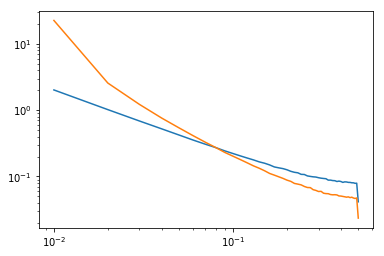

In [29]:
plt.loglog(x_fold, mMAF_unlinked)
plt.loglog(x_fold, mMAF_bsc_unlinked)
plt.show()

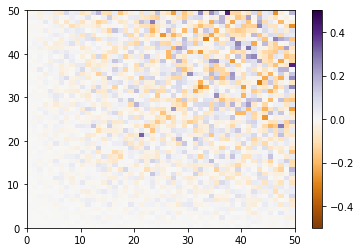

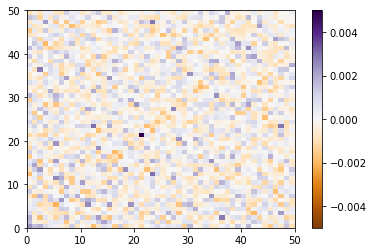

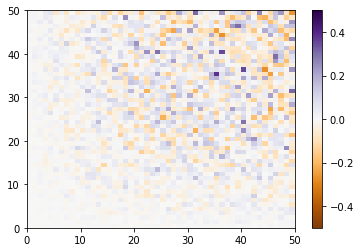

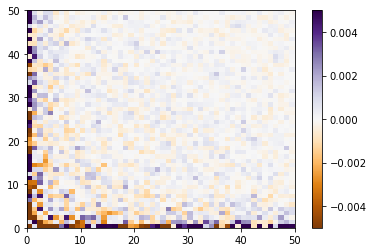

0.0155266847647


In [44]:
plt.pcolormesh(PMI_unlinked, vmin=-0.5, vmax=0.5, cmap='PuOr')
plt.colorbar()
plt.show()
plt.pcolormesh(wPMI_unlinked, vmin=-0.005, vmax=0.005, cmap='PuOr')
plt.colorbar()
plt.show()


plt.pcolormesh(PMI_bsc_unlinked, vmin=-0.5, vmax=0.5, cmap='PuOr')
plt.colorbar()
plt.show()
plt.pcolormesh(wPMI_bsc_unlinked, vmin=-0.005, vmax=0.005, cmap='PuOr')
plt.colorbar()
plt.show()
print(np.sum(wPMI_bsc_unlinked)/pi_bsc_unlinked**2)

In [32]:
res = 10
pad = (res - (mMAF_unlinked.size % res)) % res

m_padded = np.pad(mMAF_unlinked, (0,pad), 'constant')
mMAF_coarse = m_padded.reshape(m_padded.size//res, res).sum(axis=1)

j_padded = np.pad(jMAF_unlinked, ((0,pad), (0,pad)), 'constant')
jMAF_coarse = j_padded.reshape(j_padded.shape[1]//res, res, j_padded.shape[1]//res, res).sum(axis=(1,3))

ratio_coarse = jMAF_coarse / (mMAF_coarse[None,:]*mMAF_coarse[:,None])
PMI_coarse = np.log2(ratio_coarse)

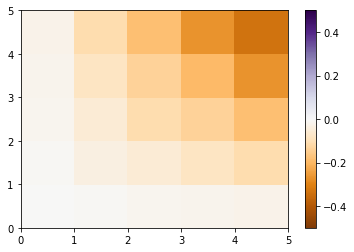

In [33]:
plt.pcolormesh(PMI_coarse, vmin=-0.5, vmax=0.5, cmap='PuOr')
plt.colorbar()
plt.show()

In [1]:
for i, r in enumerate(r_list):
    print(r)
    fig = plt.figure(figsize=(12,3))
    ax = plt.subplot(1,4,1)
    plt.pcolor(PMI_kingman[i,:,:] - PMI_unlinked, vmin=-0.5, vmax=0.5, cmap='PuOr')
    print(np.nanmean(PMI_kingman[i,:,:] - PMI_unlinked))
    #ax = plt.subplot(1,4,2)
    #ax.pcolor(PMI_mmc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    #ax = plt.subplot(1,4,3)
    #plt.pcolor(PMI_bsc[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')
    
    #ax = plt.subplot(1,4,4)
    #plt.pcolor(PMI_step[i,:,:], vmin=-0.5, vmax=0.5, cmap='PuOr')


    #plt.colorbar()

    #plt.colorbar()
    plt.show()

NameError: name 'r_list' is not defined